# Installation and Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Activation, GlobalAveragePooling2D, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# EDA, kinda

In [2]:
image_size = 48
folder_path = "C:/Users/Victor/Desktop/OPA saker/ai2_del2_modell/images/"

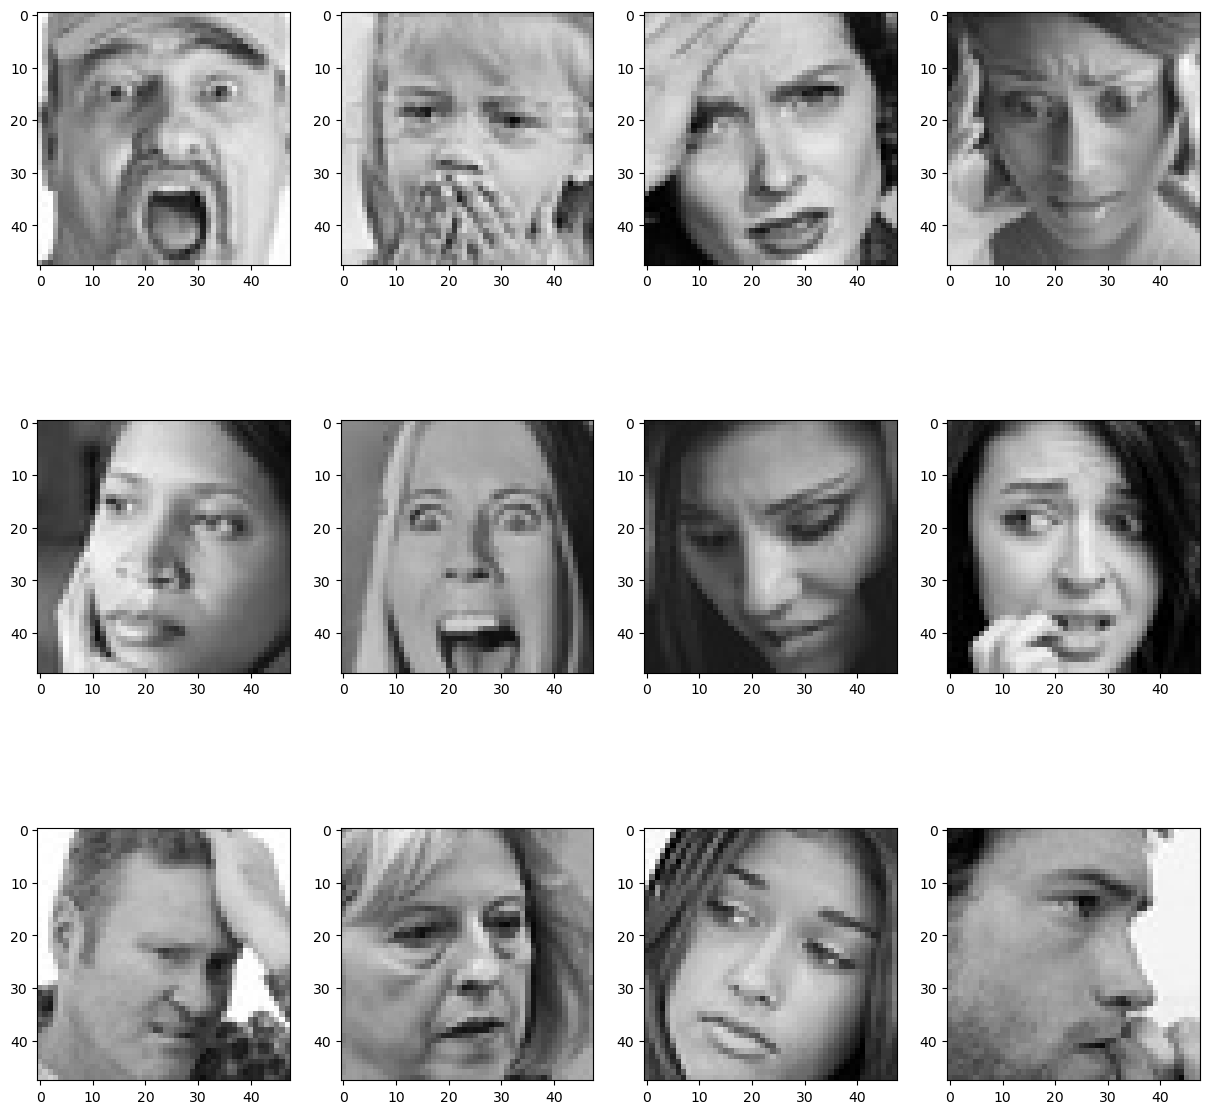

In [3]:
expression_target = 'fear'

plt.figure(figsize = (15,15))
for i in range(1,13,1):
    plt.subplot(3,4,i)
    img = load_img(folder_path + "train/" + expression_target + "/" + 
                   os.listdir(folder_path + "train/" + expression_target)[i], target_size=(image_size,image_size))
    plt.imshow(img)
plt.show()

# Creating Datasets

In [14]:
batch_size = 128

training_set = image_dataset_from_directory(folder_path + "train", 
                                            image_size=(image_size,image_size),
                                            color_mode="grayscale",
                                            batch_size= batch_size,
                                            label_mode="categorical",
                                            shuffle=True)

training_set = training_set.repeat()

validation_set = image_dataset_from_directory(folder_path + "validation", 
                                              image_size=(image_size,image_size),
                                              color_mode="grayscale",
                                              batch_size= batch_size,
                                              label_mode="categorical",
                                              shuffle=True)

validation_set = validation_set.repeat()

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [5]:
classes = 7

model = Sequential()

# First Conv layer
model.add(Conv2D(64,(3,3), padding="same", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Second Conv layer
model.add(Conv2D(128,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Third Conv layer
model.add(Conv2D(256,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Fourth Conv layer
model.add(Conv2D(512,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Fifth Conv layer
model.add(Conv2D(512,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Flatten pass
model.add(Flatten())

# First Dense layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(rate=0.25))

# Second Dense layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(rate=0.25))

# Output Dense layer
model.add(Dense(classes, activation="softmax"))

# Model compilation and summary
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

model2 = model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [6]:
# Checkpoints model upon training degredation
checkpoint = ModelCheckpoint(filepath='C:/Users/Victor/Desktop/OPA saker/ai2_del2_modell/model/model.keras',
                             monitor="val_accuracy", 
                             verbose=1, 
                             save_best_only=True, 
                             mode="max")

# Stops the learning upon training degredation and restores previous 
# training weights
early_stopping = EarlyStopping(monitor="val_loss",
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

# Reduces learning rate upon training plateau
reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_lr]

In [7]:

# Checkpoints model upon training degredation
checkpoint2 = ModelCheckpoint(filepath='C:/Users/Victor/Desktop/OPA saker/ai2_del2_modell/model/object_model.keras',
                             monitor="val_accuracy", 
                             verbose=1, 
                             save_best_only=True, 
                             mode="max")

callbacks_list2 = [early_stopping, checkpoint2, reduce_lr]

In [8]:
model.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.0001),metrics=["accuracy"])

model2.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.0001),metrics=["accuracy"])

epochs = 50

In [16]:

history = model.fit(x = training_set,
                    steps_per_epoch=(28821//batch_size)-1,
                    epochs=epochs,
                    validation_data=validation_set,
                    validation_steps=(7066//batch_size)-1,
                    callbacks=callbacks_list)

Epoch 1/50
224/224 [==============================] - ETA: 0s - loss: 0.9856 - accuracy: 0.6280
Epoch 00001: val_accuracy improved from 0.61010 to 0.62312, saving model to C:/Users/Victor/Desktop/OPA saker/ai2_del2_modell/model\model.keras
224/224 [==============================] - 201s 897ms/step - loss: 0.9856 - accuracy: 0.6280 - val_loss: 1.0256 - val_accuracy: 0.6231
Epoch 2/50
224/224 [==============================] - ETA: 0s - loss: 0.9735 - accuracy: 0.6317
Epoch 00002: val_accuracy improved from 0.62312 to 0.62746, saving model to C:/Users/Victor/Desktop/OPA saker/ai2_del2_modell/model\model.keras
224/224 [==============================] - 201s 899ms/step - loss: 0.9735 - accuracy: 0.6317 - val_loss: 1.0253 - val_accuracy: 0.6275
Epoch 3/50
224/224 [==============================] - ETA: 0s - loss: 0.9688 - accuracy: 0.6370
Epoch 00003: val_accuracy did not improve from 0.62746
224/224 [==============================] - 200s 894ms/step - loss: 0.9688 - accuracy: 0.6370 - val_

In [ ]:
history2 = model2.fit(x = training_set,
                    steps_per_epoch=training_set.n//training_set.batch_size,
                    epochs=epochs,
                    validation_data=validation_set,
                    validation_steps=validation_set.n//validation_set.batch_size,
                    callbacks=callbacks_list2)